<a href="https://colab.research.google.com/github/mrdbourke/tensorflow-deep-learning/blob/main/04_transfer_learning_in_tensorflow_part_1_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. Transfer Learning with TensorFlow Part 1: Feature Extraction

Transfer learning is leveraging a working model's existing architecture and learned patterns for our own problem.

There are two main benefits:
1. Can leverage an existing neural network architecture proven to work on problems similar to our own.
2. Can leverage a working neural network architecture which has **already learned** patterns on similar data to our own. This often results in achieving great results with less custom data.



# 04. Transfer Learning with TensorFlow Part 1: Feature Extraction

Reference: https://github.com/mrdbourke/tensorflow-deep-learning/tree/main

We've built a bunch of convolutional neural networks from scratch and they all seem to be learning, however, there is still plenty of room for improvement.

To improve our model(s), we could spend a while trying different configurations, adding more layers, changing the learning rate, adjusting the number of neurons per layer and more.

However, doing this is very time consuming.

Luckily, there's a technique we can use to save time.

It's called **transfer learning**, in other words, taking the patterns (also called weights) another model has learned from another problem and using them for our own problem.

There are two main benefits to using transfer learning:
1. Can leverage an existing neural network architecture proven to work on problems similar to our own.
2. Can leverage a working neural network architecture which has **already learned** patterns on similar data to our own. This often results in achieving great results with less custom data.

What this means is, instead of hand-crafting our own neural network architectures or building them from scratch, we can utilise models which have worked for others.

And instead of training our own models from scratch on our own datasets, we can take the patterns a model has learned from datasets such as [ImageNet](http://www.image-net.org/) (millions of images of different objects) and use them as the foundation of our own. Doing this often leads to getting great results with less data.

Over the next few notebooks, we'll see the power of transfer learning in action.

## What we're going to cover

We're going to go through the following with TensorFlow:

- Introduce transfer learning (a way to beat all of our old self-built models)
- Using a smaller dataset to experiment faster (10% of training samples of 10 classes of food)
- Build a transfer learning feature extraction model using TensorFlow Hub
- Introduce the TensorBoard callback to track model training results
- Compare model results using TensorBoard

## How you can use this notebook

You can read through the descriptions and the code (it should all run, except for the cells which error on purpose), but there's a better option.

Write all of the code yourself.

Yes. I'm serious. Create a new notebook, and rewrite each line by yourself. Investigate it, see if you can break it, why does it break?

You don't have to write the text descriptions but writing the code yourself is a great way to get hands-on experience.

Don't worry if you make mistakes, we all do. The way to get better and make less mistakes is to **write more code**.

In [3]:
# Add timestamp
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2023-05-22 21:16:46.560631


## Using a GPU

To begin, let's check to see if we're using a GPU. Using a GPU will make sure our model trains faster than using just a CPU.


In [4]:
# Are we using a GPU?
!nvidia-smi

Mon May 22 21:16:46 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.68                 Driver Version: 531.68       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2060       WDDM | 00000000:01:00.0  On |                  N/A |
| 32%   36C    P8               23W / 184W|    697MiB / 12288MiB |     16%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

If the cell above doesn't output something which looks like:

```
Fri May 19 13:45:35 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.68                 Driver Version: 531.68       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2060       WDDM | 00000000:01:00.0  On |                  N/A |
| 32%   35C    P8               22W / 184W|    829MiB / 12288MiB |     40%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+----------------------+
                                                                                         
+---------------------------------------------------------------------------------------+
| Processes:                                                                            |
|  GPU   GI   CI        PID   Type   Process name                            GPU Memory |
|        ID   ID                                                             Usage      |
|=======================================================================================|
|    0   N/A  N/A      3828    C+G   ...ekyb3d8bbwe\PhoneExperienceHost.exe    N/A      |
|    0   N/A  N/A      4368    C+G   ...CBS_cw5n1h2txyewy\TextInputHost.exe    N/A      |
|    0   N/A  N/A      4992    C+G   ..._8wekyb3d8bbwe\Microsoft.Photos.exe    N/A      |
|    0   N/A  N/A      5168    C+G   ...2txyewy\StartMenuExperienceHost.exe    N/A      |
|    0   N/A  N/A      5824    C+G   ....Search_cw5n1h2txyewy\SearchApp.exe    N/A      |
|    0   N/A  N/A      6428    C+G   ...1.0_x64__8wekyb3d8bbwe\Music.UI.exe    N/A      |
|    0   N/A  N/A      7844    C+G   ...rnzvtm6\SafeInCloud\SafeInCloud.exe    N/A      |
|    0   N/A  N/A      9324    C+G   ...ata\Local\LINE\bin\current\LINE.exe    N/A      |
|    0   N/A  N/A     10444    C+G   ...64__8wekyb3d8bbwe\CalculatorApp.exe    N/A      |
|    0   N/A  N/A     10852    C+G   ...oogle\Chrome\Application\chrome.exe    N/A      |
|    0   N/A  N/A     16652    C+G   ...16.0_x86__zpdnekdrzrea0\Spotify.exe    N/A      |
|    0   N/A  N/A     17024    C+G   ...les\Microsoft OneDrive\OneDrive.exe    N/A      |
|    0   N/A  N/A     17636    C+G   ...siveControlPanel\SystemSettings.exe    N/A      |
|    0   N/A  N/A     17992    C+G   ...5n1h2txyewy\ShellExperienceHost.exe    N/A      |
|    0   N/A  N/A     18180    C+G   C:\Windows\explorer.exe                   N/A      |
|    0   N/A  N/A     18448    C+G   ...Programs\Microsoft VS Code\Code.exe    N/A      |
|    0   N/A  N/A     18556    C+G   ...ta\Local\Programs\Notion\Notion.exe    N/A      |
+---------------------------------------------------------------------------------------+
```

Go to Runtime -> Change Runtime Type -> Hardware Accelerator and select "GPU", then rerun the cell above.

## Check the OS

In [5]:
import os
print("posix = Linux, nt = windows, java = java")
print("your os name is",os.name)

import platform
print("your os is ",platform.system()+platform.release())

posix = Linux, nt = windows, java = java
your os name is nt
your os is  Windows10


our os is Windows10

## Transfer leanring with TensorFlow Hub: Getting great results with 10% of the data

If you've been thinking, "surely someone else has spent the time crafting the right model for the job..." then you're in luck. 

For many of the problems you'll want to use deep learning for, chances are, a working model already exists.

And the good news is, you can access many of them on TensorFlow Hub.

[TensorFlow Hub](https://tfhub.dev/) is a repository for existing model components. It makes it so you can import and use a fully trained model with as little as a URL.

Now, I really want to demonstrate the power of transfer learning to you.

To do so, what if I told you we could get much of the same results (or better) than our best model has gotten so far with only 10% of the original data, in other words, 10x less data.

This seems counterintuitive right?

Wouldn't you think more examples of what a picture of food looked like led to better results?

And you'd be right if you thought so, generally, more data leads to better results.

However, what if you didn't have more data? What if instead of 750 images per class, you had 75 images per class?

Collecting 675 more images of a certain class could take a long time.

So this is where another major benefit of transfer learning comes in.

**Transfer learning often allows you to get great results with less data.**

But don't just take my word for it. Let's download a subset of the data we've been using, namely 10% of the training data from the `10_food_classes` dataset and use it to train a food image classifier on.

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/04-transfer-learning-feature-extraction.png)
*What we're working towards building. Taking a pre-trained model and adding our own custom layers on top, extracting all of the underlying patterns learned on another dataset our own images.*



## Downloading and becoming one with the data

If you want to download a file from the internet, you can use the following code:

* In Google-Collab, you can use the following code: 
```python
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
```

* on Windows 10. In my Jupyter Notebook cell this code: 
```python
import wget
wget.download("https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip")
```


In [6]:
# Get data (10% of 10 food classes from Food101) - https://www.kaggle.com/datasets/kmader/food41
import zipfile

# Download data
import wget
if os.path.exists("10_food_classes_10_percent.zip") != True:
    wget.download("https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip") 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip", "r") # "r" means read in binary mode
zip_ref.extractall() # Extract all the contents of zip file in current directory
zip_ref.close() # Close the zip file

# Delete the zip file
# rm -rf ./tensorflow_hub/ # linux
!del /s /q "10_food_classes_10_percent.zip"  # windows

In [6]:
# How many images in each folder?
import os

# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent\test'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent

Notice how each of the training directories now has 75 images rather than 750 images. This is key to demonstrating how well transfer learning can perform with less labelled images.

The test directories still have the same amount of images. This means we'll be training on less data but evaluating our models on the same amount of test data.

## Creating data loaders (preparing the data)

Now we've downloaded the data, let's use the [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) class along with the `flow_from_directory` method to load in our images in batches.

In [7]:
# Setup data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("Testing images:")
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

Training images:
Found 750 images belonging to 10 classes.
Testing images:
Found 2500 images belonging to 10 classes.


Excellent! Loading in the data we can see we've got 750 images in the training dataset belonging to 10 classes (75 per class) and 2500 images in the test set belonging to 10 classes (250 per class).

## Setting up callbacks (things to run whilst our model trains)

Before we build a model, there's an important concept we're going to get familiar with because it's going to play a key role in our future model building experiments.

And that concept is **callbacks**.

[Callbacks](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks) are extra functionality you can add to your models to be performed during or after training. Some of the most popular callbacks include:
* [**Experiment tracking with TensorBoard**](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard) - log the performance of multiple models and then view and compare these models in a visual way on [TensorBoard](https://www.tensorflow.org/tensorboard) (a dashboard for inspecting neural network parameters). Helpful to compare the results of different models on your data.
* [**Model checkpointing**](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) - save your model as it trains so you can stop training if needed and come back to continue off where you left. Helpful if training takes a long time and can't be done in one sitting.
* [**Early stopping**](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) - leave your model training for an arbitrary amount of time and have it stop training automatically when it ceases to improve. Helpful when you've got a large dataset and don't know how long training will take.

We'll explore each of these overtime but for this notebook, we'll see how the TensorBoard callback can be used.

The TensorBoard callback can be accessed using [`tf.keras.callbacks.TensorBoard()`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard). 

Its main functionality is saving a model's training performance metrics to a specified `log_dir`.

By default, logs are recorded every epoch using the `update_freq='epoch'` parameter. This is a good default since tracking model performance too often can slow down model training.

To track our modelling experiments using TensorBoard, let's create a function which creates a TensorBoard callback for us.

> 🔑 **Note:** We create a function for creating a TensorBoard callback because as we'll see later on, each model needs its own TensorBoard callback instance (so the function will create a new one each time it's run).

In [8]:
# Create tensorboard callback (functionized because need to create a new one for each model)
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

Because you're likely to run multiple experiments, it's a good idea to be able to track them in some way.

In our case, our function saves a model's performance logs to a directory named `[dir_name]/[experiment_name]/[current_timestamp]`, where:
* `dir_name` is the overall logs directory
* `experiment_name` is the particular experiment
* `current_timestamp` is the time the experiment started based on Python's [`datetime.datetime().now()`](https://docs.python.org/3/library/datetime.html#datetime.datetime.now)

> 🔑 **Note:** Depending on your use case, the above experimenting tracking naming method may work or you might require something more specific. The good news is, the TensorBoard callback makes it easy to track modelling logs as long as you specify where to track them. So you can get as creative as you like with how you name your experiments, just make sure you or your team can understand them.



## Creating models using TensorFlow Hub

In the past we've used TensorFlow to create our own models layer by layer from scratch.

Now we're going to do a similar process, except the majority of our model's layers are going to come from [TensorFlow Hub](https://tfhub.dev/).

In fact, we're going to use two models from TensorFlow Hub:
1. [ResNetV2](https://arxiv.org/abs/1603.05027) -  a state of the art computer vision model architecture from 2016.
2. [EfficientNet](https://arxiv.org/abs/1905.11946) - a state of the art computer vision architecture from 2019.

Browsing the TensorFlow Hub page and sorting for image classification, we found the following feature vector - 
https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1

In [9]:
# Import dependencies
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [10]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

# MobileNet_v1
mobilenet_url = "https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/feature_vector/5"

# # New: EfficientNetB0 feature vector (version 2)
# efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"

In [11]:
# Let's make a create_model() function to create a model from a URL

def create_model(model_url, num_classes=10):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.
  
  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape
  
  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer      
  ])

  return model

### **Creating and testing ResNet TensorFlow Hub Feature Extraction model**

In [12]:
train_data_10_percent.num_classes

10

In [13]:
# Create model
resnet_model = create_model(resnet_url, num_classes=train_data_10_percent.num_classes)

# Compile
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [14]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [15]:
# Let's fit our ResNet model to the data (10 percent of 10 classes)

# Fit the model
resnet_history = resnet_model.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="resnet50V2")]) # name of log files

Saving TensorBoard log files to: tensorflow_hub/resnet50V2/20230522-211704
Epoch 1/5
24/24 [==============================] - 26s 743ms/step - loss: 2.0593 - accuracy: 0.3267 - val_loss: 1.2177 - val_accuracy: 0.6276
Epoch 2/5
24/24 [==============================] - 7s 317ms/step - loss: 0.9375 - accuracy: 0.7333 - val_loss: 0.8630 - val_accuracy: 0.7260
Epoch 3/5
24/24 [==============================] - 8s 325ms/step - loss: 0.6282 - accuracy: 0.8173 - val_loss: 0.7530 - val_accuracy: 0.7596
Epoch 4/5
24/24 [==============================] - 8s 321ms/step - loss: 0.4857 - accuracy: 0.8707 - val_loss: 0.7018 - val_accuracy: 0.7732
Epoch 5/5
24/24 [==============================] - 7s 313ms/step - loss: 0.3860 - accuracy: 0.9107 - val_loss: 0.6803 - val_accuracy: 0.7792


Wow!

That. Is. Incredible. Our transfer learning feature extractor model out performed ALL of the previous models we built by hand...(substantially) and in a quicker training time. AND with only 10% of the training examples.


In [16]:
# Let's create a funciton to plot our loss curves.
# Tidbit: you could put a function like this into a script called "helper.py" and import it when you need it...

import matplotlib.pyplot as plt

# Plot the validation and training curves
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.

    Args:
        history: TensorFlow History object.

    Returns:
        Plots of training/ validation loss and accuracy metrics.
    """

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    # Plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label= "training_accuracy")
    plt.plot(epochs, val_accuracy, label= "val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

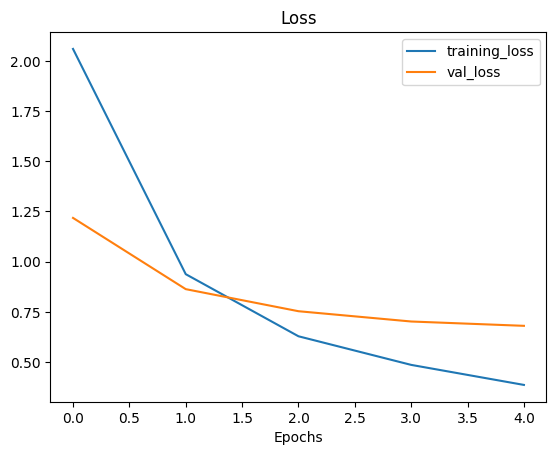

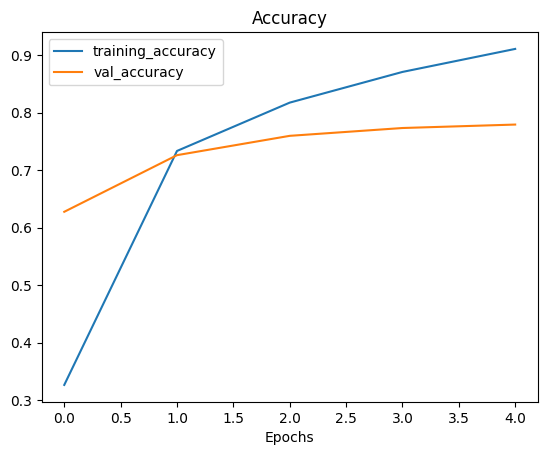

In [17]:
plot_loss_curves(resnet_history)

In [18]:
resnet_model.save("resnet_model")

INFO:tensorflow:Assets written to: resnet_model\assets


INFO:tensorflow:Assets written to: resnet_model\assets


### **Creating and testing EfficientNetB0 TensorFlow Hub Feature Extraction model**

In [19]:
# Create EfficentNetB0 feature extractor model
efficientnet_model = create_model(efficientnet_url, num_classes=train_data_10_percent.num_classes)

# Compile
efficientnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

# Fit EfficientNet model to 10% of training data
efficientnet_history = efficientnet_model.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="efficientnetb0")]) # name of log files

Saving TensorBoard log files to: tensorflow_hub/efficientnetb0/20230522-211816
Epoch 1/5
24/24 [==============================] - 19s 429ms/step - loss: 1.8325 - accuracy: 0.4880 - val_loss: 1.2627 - val_accuracy: 0.7520
Epoch 2/5
24/24 [==============================] - 7s 312ms/step - loss: 1.0470 - accuracy: 0.7827 - val_loss: 0.8487 - val_accuracy: 0.8260
Epoch 3/5
24/24 [==============================] - 8s 323ms/step - loss: 0.7530 - accuracy: 0.8373 - val_loss: 0.6872 - val_accuracy: 0.8440
Epoch 4/5
24/24 [==============================] - 7s 309ms/step - loss: 0.6114 - accuracy: 0.8760 - val_loss: 0.6036 - val_accuracy: 0.8524
Epoch 5/5
24/24 [==============================] - 7s 314ms/step - loss: 0.5171 - accuracy: 0.8893 - val_loss: 0.5531 - val_accuracy: 0.8596


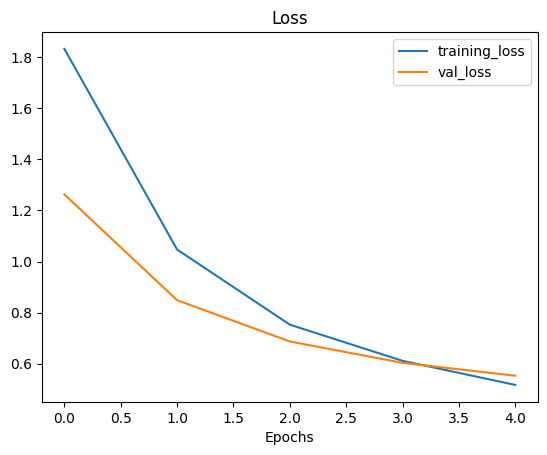

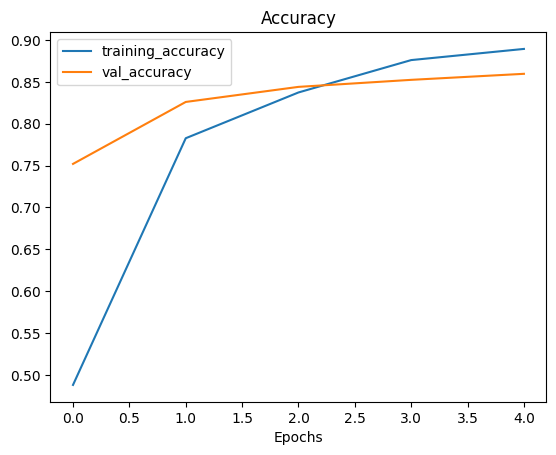

In [20]:
plot_loss_curves(efficientnet_history)

In [21]:
efficientnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


In [22]:
efficientnet_model.save("efficientnet_model")

INFO:tensorflow:Assets written to: efficientnet_model\assets


INFO:tensorflow:Assets written to: efficientnet_model\assets


### **Creating and testing MobileNetV1 TensorFlow Hub Feature Extraction model**

In [23]:
# Create EfficentNetB0 feature extractor model
mobilenet_model = create_model(mobilenet_url, num_classes=train_data_10_percent.num_classes)

# Compile
mobilenet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

# Fit EfficientNet model to 10% of training data
mobilenet_history = mobilenet_model.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="mobilenetv1")]) # name of log files

Saving TensorBoard log files to: tensorflow_hub/mobilenetv1/20230522-211922
Epoch 1/5
24/24 [==============================] - 13s 370ms/step - loss: 1.8058 - accuracy: 0.4373 - val_loss: 1.2727 - val_accuracy: 0.6860
Epoch 2/5
24/24 [==============================] - 7s 309ms/step - loss: 1.0429 - accuracy: 0.7640 - val_loss: 0.8578 - val_accuracy: 0.7968
Epoch 3/5
24/24 [==============================] - 7s 315ms/step - loss: 0.7411 - accuracy: 0.8333 - val_loss: 0.6992 - val_accuracy: 0.8228
Epoch 4/5
24/24 [==============================] - 7s 311ms/step - loss: 0.5881 - accuracy: 0.8720 - val_loss: 0.6192 - val_accuracy: 0.8340
Epoch 5/5
24/24 [==============================] - 7s 309ms/step - loss: 0.4922 - accuracy: 0.9000 - val_loss: 0.5766 - val_accuracy: 0.8360


In [24]:
mobilenet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             2731616   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 2,744,426
Trainable params: 12,810
Non-trainable params: 2,731,616
_________________________________________________________________


In [25]:
mobilenet_model.save("mobilenetv1")

INFO:tensorflow:Assets written to: mobilenetv1\assets


INFO:tensorflow:Assets written to: mobilenetv1\assets


In [26]:
# How many layers does our efficientnetb0 feature extractor have?
len(efficientnet_model.layers[0].weights)

309

## **Different types of transfer learning**

* **"As is" transfer learning** - using an existing model with no changes what so ever (e.g using ImageNet mdoel on 1000 ImageNet model on 1000 ImageNet , none of you own)
* **"Feature extrction"** transfer learning-use the prelearned patterns of an existing model (e.g. EfficientNetB0 trained on ImageNet) and adjust the output layer for your own problem (e.g. 1000 classes -> 10 classes of food) 
* **"Fine-tuning" transfer learning** - use the prelearned patterns of an existing model and "fine-tune" many or all of the underlying layers (including new output layers)

## **Comparing our models results using TensorBoard**

> 🔑 **Note:** When you upload things to TensorBoard.dev, you experiments are public. So if you're running private experiments (things you don't wnat others to see) do not upload them to TensorBoard.dev.

In [27]:
# Load the TensorBoard notebook extension
# 可以使用這個直接開啟精簡版的tensorboard
# %load_ext tensorboard
# %tensorboard --logdir tensorflow_hub

In [28]:
# Clear any logs from previous runs
# 如果要刪除資料夾可以輸入這個指令
# # rm -rf ./tensorflow_hub/ # linux
# !rd /s /q tensorflow_hub  # windows

Suggested usage, use the anaconda power shell to enter the current folder, then enter this command:

```
tensorboard dev upload --logdir tensorflow_hub --name "<your tensorboard name>" --description "<your tensorboard description>" --one_shot
```

We enter this command this time
```
tensorboard dev upload --logdir tensorflow_hub --name "EfficientNetB0 vs. ResNet50V2 vs. MobileNetV3" --description "Comparing three different TF Hub feature extraction model architectures using 10 percent of the training data" --one_shot
```

Our TensorBoard experiments are uploaded pulically here: https://tensorboard.dev/experiment/A0qCpO4PTva7CDYN0hNBBg/

In [40]:
# Check out what TensorBoard experiments you have

!tensorboard dev list

https://tensorboard.dev/experiment/A0qCpO4PTva7CDYN0hNBBg/
	Name                 EfficientNetB0 vs. ResNet50V2 vs. MobileNetV3
	Description          Comparing three different TF Hub feature extraction model architectures using 10 percent of the training data
	Id                   A0qCpO4PTva7CDYN0hNBBg
	Created              2023-05-22 21:22:31 (6 minutes ago)
	Updated              2023-05-22 21:22:37 (6 minutes ago)
	Runs                 6
	Tags                 5
	Scalars              90
	Tensor bytes         0
	Binary object bytes  7964251


Total: 1 experiment(s)


In [39]:
# Delete an experiment

# !tensorboard dev delete --experiment_id <tensorboard Id>
!tensorboard dev delete --experiment_id VDLkZvLrRrmgnn28ZDfAJw

Deleted experiment VDLkZvLrRrmgnn28ZDfAJw.


In [41]:
# Confirm the deletion by re-checking what experiment you have left

!tensorboard dev list

https://tensorboard.dev/experiment/A0qCpO4PTva7CDYN0hNBBg/
	Name                 EfficientNetB0 vs. ResNet50V2 vs. MobileNetV3
	Description          Comparing three different TF Hub feature extraction model architectures using 10 percent of the training data
	Id                   A0qCpO4PTva7CDYN0hNBBg
	Created              2023-05-22 21:22:31 (7 minutes ago)
	Updated              2023-05-22 21:22:37 (7 minutes ago)
	Runs                 6
	Tags                 5
	Scalars              90
	Tensor bytes         0
	Binary object bytes  7964251


Total: 1 experiment(s)
